In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [5]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats


In [6]:
import glob

#get all csv file names
filepath='Datafor555/FL'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_fl = pd.read_csv(filename)
    df_fl['year']=yr
    li.append(df_fl)

#concatenate all csv files into a dataframe
df_FL = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_FL_grouped_yearly=df_FL.groupby(['year']).mean()

df_FL_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,102,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,102,106,107,108,109,113,114,119,120,121,122,123,128,129,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,11,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,102,106,107,108,109,113,114,119,120,121,122,123,128,129,130,131,133) have mixed types.Specify dtype

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,...,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,12,3.344172,1.198140,0.036338,3.802640,23704.485429,81.290026,6.299471,0.326567,2.414322,2.756461e+07,8.054551e+07,16.384328,2.899979,3.168930,3.667075,10.555626,1971.295272,2.537389,1.811612,16273.325216,1995.266822,11.839946,0.244486,9.927221,0.027421,4.917093,0.455530,0.773881,1.998523,3.625334,3.803630,5.198532,2.715447,1.860163,4.427361,0.792027,14.536295,18.804439,91.816343,...,10.244398,11.398225,96.388603,1.400281,4.209828,3.006350,1.470326,57.892244,1.471871,38.583138,4.661777,35.337917,1.049213,12.314554,711.669463,23.508283,628.139683,710.739178,700.801296,181.895542,105.893884,316.615356,2017.252438,0.009508,0.379222,1.716732,0.383569,0.006109,315.054580,8.532508,0.247407,1.448785,24056.963125,2017.675253,0.005509,83.461880,NaN,NaN,NaN,NaN
01,12,3.413500,1.210326,0.035970,3.830501,23859.013607,80.347516,6.185427,0.366389,1.245260,2.773074e+07,8.100308e+07,15.766334,2.894074,3.037926,3.531434,10.683664,1972.190765,2.541851,1.801132,16671.577170,1996.335584,11.762258,0.241881,9.990742,0.027734,4.921062,0.463409,0.973498,2.020295,3.600207,3.806904,5.188675,3.098743,2.093357,4.397728,0.782425,14.552551,18.462006,91.735068,...,10.307790,11.509995,95.344940,1.409351,3.521785,2.443766,1.311829,58.318342,1.312336,38.870366,4.683321,35.572775,1.036881,12.039654,656.487401,23.517083,643.262136,664.227261,637.974782,225.783014,106.611308,305.216448,2003.492857,0.009423,0.343767,1.731762,0.367508,0.005761,314.482522,8.480581,0.243754,1.428218,24089.676787,2017.199558,0.004670,84.063523,NaN,NaN,NaN,NaN
02,12,3.437598,1.223746,0.037852,3.828524,23633.488740,79.606783,5.966040,0.392138,0.212587,2.773541e+07,8.141405e+07,15.532456,2.901825,3.542955,3.790192,10.887219,1972.789797,2.557331,1.787765,17840.427442,1998.772383,11.677022,0.246994,9.960925,0.028000,4.926342,0.464453,1.055355,2.021216,3.601310,3.836756,5.209361,3.032368,2.091993,4.346982,0.783796,14.444098,18.773991,100.424159,...,10.320252,11.580911,95.519630,1.408350,3.163505,2.214895,1.312450,57.765786,1.312394,38.810967,4.690476,35.732899,1.044809,11.741580,616.904445,23.499300,612.491803,627.906189,628.619289,211.161442,103.635816,280.737149,2003.942472,0.009428,0.318711,1.731450,0.350485,0.008094,322.187216,8.034793,0.230556,1.411952,25623.611837,2019.608524,0.006321,84.309916,NaN,NaN,NaN,NaN
03,12,3.450963,1.264359,0.041861,3.843888,23927.628662,78.921722,9.580231,0.402723,0.129929,2.782763e+07,8.182136e+07,15.178286,2.899136,3.607651,3.838292,10.956372,1973.437340,2.570495,1.826

In [7]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_FL['year']=df_FL['year'].map(d)
df_FL

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,12,10001,1,2.0,1.0,41,0.0,1.0,15,0.0,CRESTWOOD W 2/11X8/173,NaN,US41 / SR 45,2.5 MI. N OF SR-771,99.99,NaN,NaN,NaN,NaN,27020000.0,82131800.0,0.0,3.0,1.0,1.0,2.0,1974.0,4.0,0.0,33098.0,1988.0,4,13.4,2.0,0.0,0.0,N,N,N,N,...,NaN,NaN,NaN,0.0,NaN,6,0,0,NaN,0.0,NaN,Y,6,65321.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,83.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,10003,1,4.0,1.0,00C74,0.0,1.0,15,0.0,MYRTLE SL 3/11X11/83,NaN,COUNTY ROAD C-74,4.4 MILES EAST OF US 17,99.99,NaN,NaN,NaN,NaN,0.0,0.0,40.0,3.0,2.0,2.0,7.0,1972.0,2.0,0.0,4746.0,1991.0,4,9.8,0.0,10.0,0.0,N,N,1,1,...,NaN,NaN,NaN,0.0,NaN,N,N,N,NaN,0.0,NaN,Y,6,8571.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,88.9,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,10004,1,4.0,2.0,0C765,0.0,1.0,15,11625.0,ALLIGATOR CREEK,NaN,COUNTY ROAD C-765,.2 MI SW OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,5.0,3.0,2.0,2.0,17.0,1957.0,2.0,0.0,3874.0,1991.0,2,12.2,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,0,0,NaN,0.0,NaN,Y,6,6996.0,2011.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,62.6,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,10005,1,4.0,2.0,C765A,0.0,1.0,15,11625.0,ALLIGATOR CREEK,NaN,COUNTY ROAD C-765A,0.8 MILE NORTH OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,10.0,3.0,2.0,2.0,8.0,1959.0,2.0,0.0,3000.0,1991.0,2,11.0,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,0,0,NaN,0.0,NaN,Y,6,5418.0,2011.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,30.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,10006,1,4.0,2.0,0C765,0.0,1.0,15,0.0,ALLIGATOR CK3/10X5/40,NaN,COUNTY ROAD C-765A,3.2MILES NORTH OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,3.0,3.0,2.0,2.0,17.0,1960.0,2.0,0.0,5100.0,1991.0,2,9.8,0.0,0.0,0.0,N,N,0,0,...,NaN,NaN,NaN,0.0,NaN,N,N,N,NaN,0.0,NaN,Y,6,9211.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,88.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12065,12,AFFLFTFA12299,1,6.0,1.0,242,0.0,3.0,NaN,12091.0,R.R.242/UNNAMED INLET,NaN,RANGE ROAD 242,T25R25WSEC24,99.99,0.0,0.0,0,0.0,30240010.0,86420600.0,10.0,3.0,72.0,72.0,8.0,2007.0,2.0,0.0,75.0,2012.0,5,10.3,0.0,0.0,0.0,1,1,1,1,...,NaN,0.0,0.0,NaN,2,1,0,0,0.0,0.0,1.0,Y,U,100.0,2032.0,0.0,Y,,,,,,,,,,,,0,,84.1,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12066,12,AFFLNVZR00001,1,8.0,8.0,0,0.0,7.0,57,71000.0,DRAINAGE CANAL (TIDAL),NaN,SERVICE RD,0.4 KM E OF MARINA BAY DR,99.99,0.0,0.0,0,0.0,27492400.0,82285500.0,3.0,3.0,72.0,72.0,9.0,2007.0,2.0,0.0,20.

In [8]:
weatherdata = pd.read_csv("Datafor555/avg_temp.FL.csv", index_col=False)
FLweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
FLweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,70.3,56.18,80.6,59.9
1,1993,70.3,49.91,81.0,59.6
2,1994,71.6,64.78,81.5,61.5
3,1995,70.8,59.10,81.2,60.4
4,1996,69.9,53.96,80.7,59.0
5,1997,71.1,59.65,81.6,60.7
6,1998,72.5,57.05,82.8,62.2
7,1999,71.2,49.69,82.1,60.1
8,2000,70.6,40.29,82.1,59.1
9,2001,70.9,52.21,81.7,60.1


In [9]:
df1_FL=df_FL.merge(FLweather, left_index=False)
df1_FL

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,12,10001,1,2.0,1.0,41,0.0,1.0,15,0.0,CRESTWOOD W 2/11X8/173,NaN,US41 / SR 45,2.5 MI. N OF SR-771,99.99,NaN,NaN,NaN,NaN,27020000.0,82131800.0,0.0,3.0,1.0,1.0,2.0,1974.0,4.0,0.0,33098.0,1988.0,4,13.4,2.0,0.0,0.0,N,N,N,N,...,NaN,6,0,0,NaN,0.0,NaN,Y,6,65321.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,83.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
1,12,10003,1,4.0,1.0,00C74,0.0,1.0,15,0.0,MYRTLE SL 3/11X11/83,NaN,COUNTY ROAD C-74,4.4 MILES EAST OF US 17,99.99,NaN,NaN,NaN,NaN,0.0,0.0,40.0,3.0,2.0,2.0,7.0,1972.0,2.0,0.0,4746.0,1991.0,4,9.8,0.0,10.0,0.0,N,N,1,1,...,NaN,N,N,N,NaN,0.0,NaN,Y,6,8571.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,88.9,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
2,12,10004,1,4.0,2.0,0C765,0.0,1.0,15,11625.0,ALLIGATOR CREEK,NaN,COUNTY ROAD C-765,.2 MI SW OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,5.0,3.0,2.0,2.0,17.0,1957.0,2.0,0.0,3874.0,1991.0,2,12.2,0.0,0.0,0.0,0,0,0,0,...,1,1,0,0,NaN,0.0,NaN,Y,6,6996.0,2011.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,NaN,62.6,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
3,12,10005,1,4.0,2.0,C765A,0.0,1.0,15,11625.0,ALLIGATOR CREEK,NaN,COUNTY ROAD C-765A,0.8 MILE NORTH OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,10.0,3.0,2.0,2.0,8.0,1959.0,2.0,0.0,3000.0,1991.0,2,11.0,0.0,0.0,0.0,0,0,0,0,...,1,1,0,0,NaN,0.0,NaN,Y,6,5418.0,2011.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,30.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
4,12,10006,1,4.0,2.0,0C765,0.0,1.0,15,0.0,ALLIGATOR CK3/10X5/40,NaN,COUNTY ROAD C-765A,3.2MILES NORTH OF US 41,99.99,NaN,NaN,NaN,NaN,0.0,0.0,3.0,3.0,2.0,2.0,17.0,1960.0,2.0,0.0,5100.0,1991.0,2,9.8,0.0,0.0,0.0,N,N,0,0,...,NaN,N,N,N,NaN,0.0,NaN,Y,6,9211.0,2011.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,88.4,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3,56.18,80.6,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389681,12,AFFLFTFA12299,1,6.0,1.0,242,0.0,3.0,NaN,12091.0,R.R.242/UNNAMED INLET,NaN,RANGE ROAD 242,T25R25WSEC24,99.99,0.0,0.0,0,0.0,30240010.0,86420600.0,10.0,3.0,72.0,72.0,8.0,2007.0,2.0,0.0,75.0,2012.0,5,10.3,0.0,0.0,0.0,1,1,1,1,...,2,1,0,0,0.0,0.0,1.0,Y,U,100.0,2032.0,0.0,Y,,,,,,,,,,,,0,,84.1,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,56.87,81.8,61.6
389682,12,AFFLNVZR00001,1,8.0,8.0,0,0.0,7.0,57,71000.0,DRAINAGE CANAL (TIDAL),NaN,SERVICE RD,0.4 KM E OF MARINA BAY DR,99.99,0.0,0.0,0,0.0,27492400.0,82285500.0,3.0,3.0,72.0,72.0,9.0,2007.0,2.0,0.0,20.0,2011.0,5,

In [15]:
df1_FL['Age_of_Bridge'] = df1_FL['year']-df1_FL['YEAR_BUILT_027']
df2_FL=df1_FL.loc[:,['Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','avg_temp','avg_prcp','min_temp','max_temp','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_FL.dropna(inplace=True)
df3_FL=df2_FL[(df2_FL['SUBSTRUCTURE_COND_060']!='N') & (df2_FL['SUPERSTRUCTURE_COND_059']!='N') & (df2_FL['DECK_COND_058']!='N')]
for col in df3_FL:
  df3_FL[col]=df3_FL[col].astype(float)
df3_FL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
2,35.0,2.0,3874.0,6.1,7.0,7.3,12.2,70.3,56.18,59.9,80.6,7.0,7.0,7.0
3,33.0,2.0,3000.0,6.1,5.0,7.4,11.0,70.3,56.18,59.9,80.6,6.0,7.0,4.0
5,31.0,2.0,1000.0,9.1,5.0,7.5,10.4,70.3,56.18,59.9,80.6,7.0,7.0,6.0
6,31.0,2.0,1000.0,6.1,8.0,7.3,11.0,70.3,56.18,59.9,80.6,6.0,6.0,6.0
7,31.0,2.0,1000.0,6.1,6.0,7.3,11.0,70.3,56.18,59.9,80.6,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389679,48.0,2.0,50.0,9.1,2.0,5.7,5.9,71.7,56.87,61.6,81.8,6.0,7.0,7.0
389680,5.0,2.0,50.0,7.7,1.0,6.7,7.0,71.7,56.87,61.6,81.8,7.0,7.0,7.0
389681,6.0,2.0,75.0,10.7,1.0,6.9,10.3,71.7,56.87,61.6,81.8,7.0,7.0,7.0
389684,63.0,1.0,20.0,3.5,4.0,4.7,4.9,71.7,56.87,61.6,81.8,9.0,9.0,9.0


In [16]:
X=df3_FL.iloc[:,:-3]
y1=df3_FL.iloc[:,-3]
y2=df3_FL.iloc[:,-2]
y3=df3_FL.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6692039093243668

Gradient Boosting Trees for SuperStructure

In [19]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf3.score(X1_test, y1_test)

0.6297226892308829

In [21]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.589077539859959

**Visualization of Current Deck and Superstructure Materials** 

In [12]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/FL/FL20.csv")
Vis.iloc[:,106]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0        N
1        N
2        N
3        1
4        1
        ..
12587    1
12588    N
12589    N
12590    8
12591    1
Name: DECK_STRUCTURE_TYPE_107, Length: 12592, dtype: object

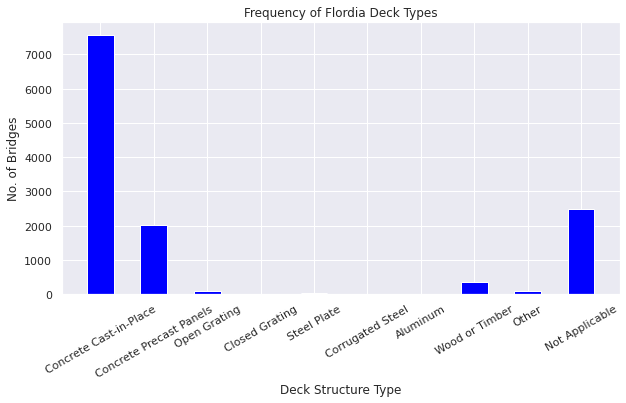

In [ ]:
Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':7564, 'Concrete Precast Panels':2020, 'Open Grating':100, 'Closed Grating':5,'Steel Plate':20,'Corrugated Steel':8,'Aluminum':1,'Wood or Timber':349,'Other':77,'Not Applicable':2488}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Flordia Deck Types")
plt.show()

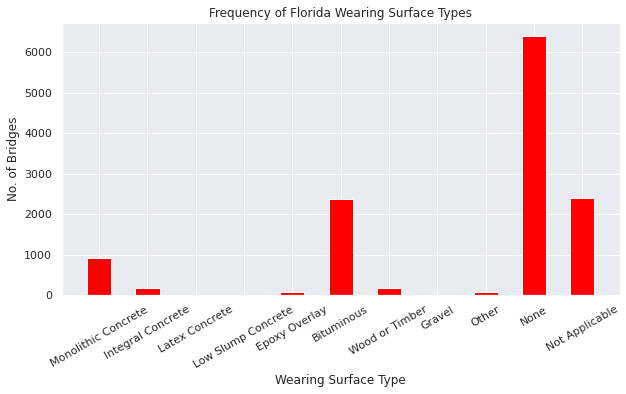

In [ ]:
Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':921, 'Integral Concrete':178, 'Latex Concrete':1, 'Low Slump Concrete':3,'Epoxy Overlay':74,'Bituminous':2381,'Wood or Timber':171,'Gravel':2,'Other':71, 'None':6402,'Not Applicable':2388}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Florida Wearing Surface Types")
plt.show()

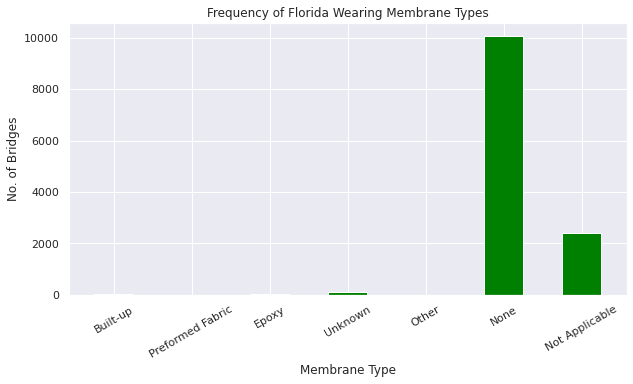

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':11, 'Preformed Fabric':5, 'Epoxy':9, 'Unknown':87,'Other':4,'None':10075,'Not Applicable':2401}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Florida Wearing Membrane Types")
plt.show()


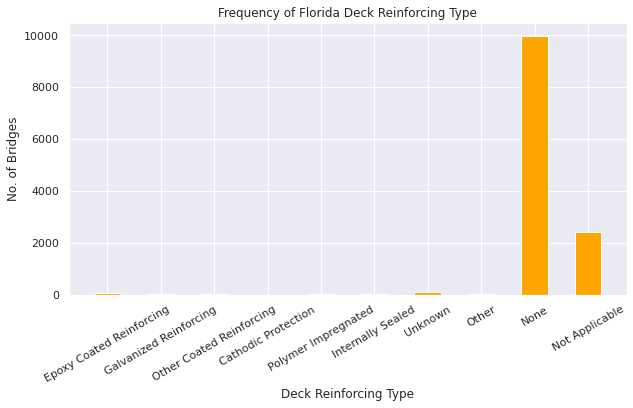

In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':59, 'Galvanized Reinforcing':1, 'Other Coated Reinforcing':1, 'Cathodic Protection':0,'Polymer Impregnated':24,'Internally Sealed':3,'Unknown':104,'Other':18,'None':9978,'Not Applicable':2404}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Florida Deck Reinforcing Type")
plt.show()

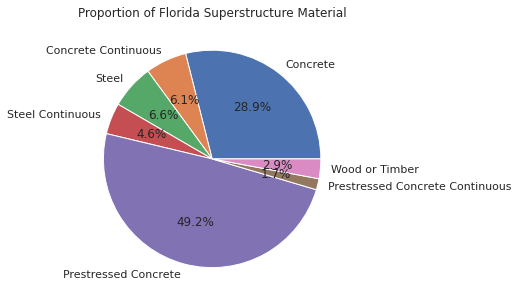

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':3627,'Concrete Continuous':769,'Steel':824,'Steel Continuous':581,'Prestressed Concrete':6164,'Prestressed Concrete Continuous':207,'Wood or Timber':367}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of Florida Superstructure Material")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

Gradient Boosting Trees for Deck

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5082008688022479

Gradient Boosting Trees for SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf3.score(X1_test, y1_test)

Gradient Boosting Trees for SubStrucute

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)